We use Euler scheme to simulate a path for SDE of the form
$$X(t) = x_0 + \int_0^t \mu(X(s), s)ds + \int_0^t \sigma(X(s), s)dW(s).$$

__Ref__

[Hir13] Computational Methods in Finance

Section 6.6.1 of [Hir13] provides Euler schemem as follows:
One can produce a sequence of pairs $(t_j, \hat X_j): j = 0, 1, \ldots$ by
$$\hat X_{j+1} = \hat X_j + \mu(\hat X_j, t_j) \Delta t_j + \sigma(\hat X_j, t_j) \sqrt{\Delta t_j} Z_j,$$
where
$\Delta t_j = t_{j+1} - t_j$ and $(Z_j)_{j\ge 0}$ is iid standard normal variables.

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

Next, we show 10 simulation for the BM

In [2]:
from SDE_V01 import *

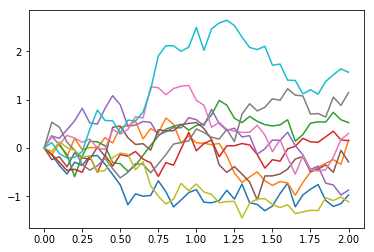

In [3]:
#std BM
b = lambda x, t: 0.
sigma = lambda x, t: 1.
x0 = 0.
iSDE = SDE(b, sigma, x0)

NumSimu = 10
for i in range(NumSimu):
    [t, Y, W] = iSDE.Euler(2., 40); 
    plt.plot(t,Y);
    

Below, we demonstrate Euler method with SDE class with P254-2-a of [Hir13] as an example

In [4]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#define function Mu and Sigma
#Here we define as of P254-2-a of [Hir13] for the illustration
r = .0475 
sig = .2
x0 = 100. #init state
T = 1.
K = 110.

In [6]:
from GBM_V02 import *

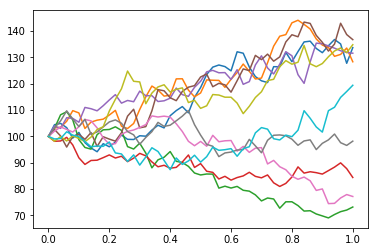

In [7]:
iGBM = GBM(r, sig, x0)
NumSimu = 10
for i in range(NumSimu): 
    [t, Y, W] = iGBM.Euler(T, 50); 
    plt.plot(t,Y);

Below is the evaluation of Put by Euler method

In [21]:
#Use MC to compute the put price of p254-2-a
#first define a function of Put payoff
def DiscPutPayoff(r, T, K, S_T):
    return np.exp(-r*T)*max(0,K-S_T)

NumMesh = 1000
NumSimu = 10000

DiscPutPayoffArray = np.zeros(NumSimu) #Simulation of payoff

for i in range(NumSimu):
    [t, Xh, Wh] = iGBM.Euler(T, NumMesh);
    DiscPutPayoffArray[i] = DiscPutPayoff(r, T, K, Xh[-1])
    
PutPrice = DiscPutPayoffArray.mean()   
print('Put price by EM is ' + str(PutPrice))

Put price by EM is 10.931408792174803


Below is the evaluation of Put by BS formula

In [20]:
iPut = iGBM._Put_(K, T)
print('Put price by BS formula is ' + str(iPut))

Put price by BS formula is 10.840425228041752


Next we calculate the convergence order

In [10]:
ArrLog2Steps = np.arange(8)
NumMinLog2Steps = 4 #Put will be calucated with different step numbers: 2**NumLog2Steps

#ArrayN = np.arange(8)
#startn = 4
ArrErr = np.zeros(ArrLog2Steps.size)
T = 1.

In [11]:
NumSimu = 200
for n in ArrLog2Steps:
    NumMesh = np.power(2, n + NumMinLog2Steps)
    errsum = 0
    for i in range(NumSimu):
        [t, Xh, Wh] = iGBM.Euler(T, NumMesh)
        XhT = Xh[-1]
        XT = iGBM._explicit_sol_(T, Wh[-1])
        errsum = errsum + np.abs(XhT - XT)
    ArrErr[n] = errsum/NumSimu

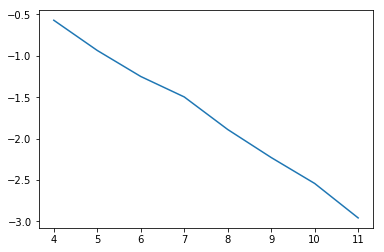

In [12]:
plt.plot(ArrLog2Steps+NumMinLog2Steps, np.log(ArrErr))

In [13]:
rate = (np.log(ArrErr[-1]) - np.log(ArrErr[0]))/(ArrLog2Steps[-1] - ArrLog2Steps[0])
print(rate)

-0.3413962881410696


In [14]:
from scipy import stats

In [15]:
x_coordinate = ArrLog2Steps+NumMinLog2Steps
y_coordinate = np.log(ArrErr)

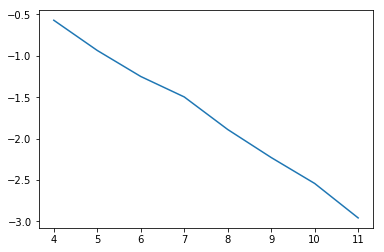

In [16]:
plt.plot(x_coordinate, y_coordinate)

In [18]:
lg = stats.linregress(x_coordinate,y_coordinate)
rate = -lg[0]
print('rate is '+ str(rate))

rate is 0.33453698218661765
